In [221]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

d = pd.read_excel('week 5 meting 1 met zilver.xlsx', header=3)

d.head()

,I_plaat (A),I _spoel(A),U_H_versterkt,U_H (mV),B (mT),U_H,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,15.0,0.000,1.0971,0.21,0.7678,NaN,NaN,Onzekerheid U_H_versterkt van 0.001 a 0.005 V,NaN,NaN,NaN,NaN
1,15.0,0.504,1.0973,0.21,21.1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.0,1.019,1.0978,0.21,41.9354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15.0,1.509,1.0978,0.21,61.7314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,2.010,1.0979,0.21,81.9718,1.42993,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
op = pd.DataFrame()
op1 = pd.DataFrame()
op2 = pd.DataFrame()
af = pd.DataFrame()

# B U_H_versterkt terug rekenen naar de input waarde, versterking was 527.
# Gelijk omrekenen naar mV en start voltage er af halen
d['U_H_versterkt'] = (d['U_H_versterkt']-d['U_H_versterkt'][0]) / 527.5675676 * 10**6
d['B (mT)'] = d['B (mT)']/1000 # Omzetten van mT naar T

op['B'] = d['B (mT)']
op['U'] = d['U_H_versterkt']

op = op.drop(op.index[5])

op1['B'] = op['B'][0:6]
op1['U'] = op['U'][0:6]

op2['B'] = op['B'][5:12]
op2['U'] = op['U'][5:12]



af['B'] = d['B (mT)'][12:23]
af['U'] = d['U_H_versterkt'][12:23]

<IPython.core.display.Javascript object>


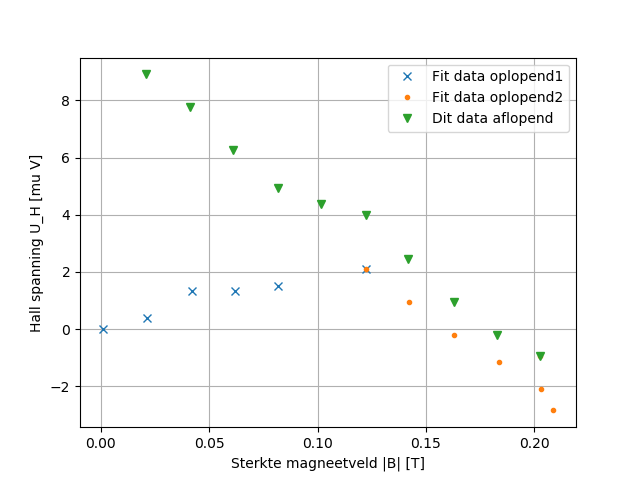

Text(0,0.5,'Hall spanning U_H [mu V]')

In [223]:
af = af.drop(af.index[10])

plt.plot(op1['B'],op1['U'], 'x', label='Fit data oplopend1')
plt.plot(op2['B'],op2['U'], '.', label='Fit data oplopend2')
plt.plot(af['B'],af['U'], 'v', label='Dit data aflopend')

plt.legend()
plt.grid()
plt.xlabel('Sterkte magneetveld |B| [T]')
plt.ylabel('Hall spanning U_H [mu V]')

In [224]:
af.to_excel('output/af.xlsx', index=False)
op1.to_excel('output/op1.xlsx', index=False)
op2.to_excel('output/op2.xlsx', index=False)